<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/Special_promotion_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

Работа с данными  

Предположим в июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?


https://drive.google.com/file/d/1bRsb_MPMbB9g4gqYzUvJbr4c0OqjPJtz/view?usp=sharing  

Обратно нужно дать файл с формулами или кодом и описание того, как получился результат поэтапно.

In [1]:
url = 'https://drive.google.com/file/d/1bRsb_MPMbB9g4gqYzUvJbr4c0OqjPJtz/view?usp=sharing'

In [2]:
!gdown --id 1bRsb_MPMbB9g4gqYzUvJbr4c0OqjPJtz

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1bRsb_MPMbB9g4gqYzUvJbr4c0OqjPJtz
To: /content/analyst_test_transactions_db.csv
100% 3.07M/3.07M [00:00<00:00, 108MB/s]


In [3]:
import pandas as pd
import numpy as np
import sqlite3

In [4]:
sqlite3.sqlite_version

'3.31.1'

# Создадим БД и загрузим данные в таблицу

In [5]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [6]:
df

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095
76853,31360,145146.0,2015-01-04,2015-08-09,547
76854,56195,8929.0,2012-09-18,2015-11-12,850
76855,46362,78673.0,2015-02-20,2015-07-21,356


In [7]:
df.dtypes

user_id               int64
order_id            float64
reg_date             object
transaction_date     object
revenue               int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76857 entries, 0 to 76856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           76857 non-null  int64  
 1   order_id          76857 non-null  float64
 2   reg_date          76857 non-null  object 
 3   transaction_date  76857 non-null  object 
 4   revenue           76857 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [9]:
con = sqlite3.connect('db')
cur = con.cursor()

In [10]:
def select(sql):
  return pd.read_sql(sql, con)

In [11]:
df.to_sql('promotion', con,index=False, if_exists='replace')

In [12]:
sql = '''
select * from promotion
'''
select (sql)

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-03-28,1095
76853,31360,145146.0,2015-01-04,2015-08-09,547
76854,56195,8929.0,2012-09-18,2015-11-12,850
76855,46362,78673.0,2015-02-20,2015-07-21,356


# Решение:

In [13]:
sql = '''
select min(reg_date), max(reg_date), min(transaction_date), max(transaction_date)
from promotion
'''
select (sql)

,min(reg_date),max(reg_date),min(transaction_date),max(transaction_date)
0,1900-01-01,2015-11-20,2015-01-01,2015-11-20


Информация о транзакциях есть только за 2015 год. 

В данной задаче сказано, что специальную акцию провели в июле. Т.к. информация о транзакциях есть только за 2015 год, то и акцию провели в июле 2015 года. Буду сравнивать данные за предыдущие месяцы (до июля 2015 года) с данными за последующие месяцы (после июля 2015 года). 

Имеет смысл перевести все даты к месячному формату (буду брать первое число кждого месяца от даты).

In [14]:
sql = '''
select user_id, order_id, reg_date, date(reg_date, 'start of month') as month_reg_date, transaction_date, date(transaction_date, 'start of month') as month_transaction_date, revenue 
from promotion
'''
select (sql)

,user_id,order_id,reg_date,month_reg_date,transaction_date,month_transaction_date,revenue
0,57562,94545.0,2013-12-22,2013-12-01,2015-07-16,2015-07-01,1088
1,40047,81824.0,2013-11-24,2013-11-01,2015-01-19,2015-01-01,1027
2,48153,144851.0,2015-07-03,2015-07-01,2015-10-29,2015-10-01,601
3,54591,116111.0,2013-07-12,2013-07-01,2015-04-30,2015-04-01,881
4,39789,134943.0,2013-05-25,2013-05-01,2015-07-21,2015-07-01,984
...,...,...,...,...,...,...,...
76852,36921,163682.0,2015-01-15,2015-01-01,2015-03-28,2015-03-01,1095
76853,31360,145146.0,2015-01-04,2015-01-01,2015-08-09,2015-08-01,547
76854,56195,8929.0,2012-09-18,2012-09-01,2015-11-12,2015-11-01,850
76855,46362,78673.0,2015-02-20,2015-02-01,2015-07-21,2015-07-01,356


In [15]:
sql = '''
select user_id, count(distinct reg_date)
from promotion
group by user_id
order by count(reg_date) desc
'''
select (sql)

,user_id,count(distinct reg_date)
0,46832,9
1,60237,8
2,54441,8
3,47671,8
4,45576,8
...,...,...
48209,-25337,1
48210,-29531,1
48211,-29822,1
48212,-32239,1


Из таблицы выше видно, что у некоторых пользователей отрицательный user_id (скорее всего знак минус появился при формировании данных). У некоторых пользователей несколько дат регистраций. Т.к. нет пояснения из-за чего такое могло произойти, то было принято решение брать минимальную дату регистрации из всех представленных дат для каждого конкретного  пользователя.

In [16]:
sql = '''
select * from promotion where user_id = 46832
'''
select (sql)

,user_id,order_id,reg_date,transaction_date,revenue
0,46832,120641.0,2014-10-11,2015-11-07,535
1,46832,168631.0,2014-01-27,2015-05-06,906
2,46832,116348.0,2013-10-25,2015-06-16,1325
3,46832,54590.0,2014-09-12,2015-07-31,1254
4,46832,-10657.0,2015-04-17,2015-08-06,656
5,46832,106417.0,2014-10-23,2015-03-03,1032
6,46832,110713.0,2015-02-15,2015-11-12,1344
7,46832,119140.0,2014-04-30,2015-07-29,1251
8,46832,119859.0,2014-01-13,2015-02-19,1093


В задании говориться, что суть акции заключается в том, что новым юзерам слали письмо с купоном. Не совсем понятно, кого в данном случае считать "новым юзером". Предположим, что это пользователи, которые зарегистрировались в июле 2015 или позже.

In [17]:
sql = '''
with prom_1 as 
(
select user_id, order_id, reg_date, date(reg_date, 'start of month') as month_reg_date, transaction_date, date(transaction_date, 'start of month') as month_transaction_date, revenue 
from promotion
),

new_reg as --посчитаем минимальную дату регистрации и отберем тех юзеров, у которых эта дата >='2015-01-01'
(
select user_id, min(month_reg_date) as new_reg_month
from prom_1
group by user_id
having min(month_reg_date) >= '2015-01-01'
),

new_data as --все пользователи, которые зарегались в 2015 году.
/*Это итогавая таблица с данными за 2015 год, с которой буду в дальнейшем работать*/
(
select p1.user_id,p1.order_id,p1.month_transaction_date,p1.revenue, nr.new_reg_month
from prom_1 p1
join new_reg nr
  on p1.user_id = nr.user_id
), 

diff_date as --рассчитаем разницу между month_transaction_date и new_reg_month
(
select *, round((JulianDay(month_transaction_date) - JulianDay(new_reg_month))/30) as diff_date
from new_data
)




select * from diff_date


'''
df = select (sql)

In [18]:
df

,user_id,order_id,month_transaction_date,revenue,new_reg_month,diff_date
0,48153,144851.0,2015-10-01,601,2015-07-01,3.0
1,72102,84827.0,2015-11-01,946,2015-08-01,3.0
2,68685,37792.0,2015-09-01,854,2015-01-01,8.0
3,56674,181304.0,2015-10-01,978,2015-03-01,7.0
4,66305,75600.0,2015-09-01,1296,2015-01-01,8.0
...,...,...,...,...,...,...
19503,79426,89007.0,2015-04-01,1086,2015-01-01,3.0
19504,46705,144147.0,2015-11-01,631,2015-04-01,7.0
19505,41215,132032.0,2015-08-01,224,2015-01-01,7.0
19506,82072,63328.0,2015-08-01,881,2015-08-01,0.0


In [19]:
df.groupby('new_reg_month').agg({'user_id':'nunique'}).sort_index()

,user_id
new_reg_month,
2015-01-01,2292
2015-02-01,1957
2015-03-01,1828
2015-04-01,1632
2015-05-01,1270
2015-06-01,1609
2015-07-01,1865
2015-08-01,1370
2015-09-01,962


In [20]:
svod = df.pivot_table(index='new_reg_month', columns='diff_date', values='user_id', aggfunc='nunique')

In [21]:
vsego_reg_users = df.groupby('new_reg_month').agg({'user_id':'nunique'}).sort_index().T

In [22]:
vsego_reg_users

new_reg_month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
user_id,2292,1957,1828,1632,1270,1609,1865,1370,962,831,314


In [23]:
vrem = svod.T

In [24]:
vrem

new_reg_month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
diff_date,,,,,,,,,,,
0.0,268.0,260.0,300.0,316.0,313.0,415.0,528.0,580.0,413.0,467.0,314.0
1.0,266.0,277.0,253.0,258.0,234.0,348.0,618.0,368.0,367.0,373.0,NaN
2.0,297.0,266.0,237.0,236.0,196.0,290.0,334.0,305.0,213.0,NaN,NaN
3.0,267.0,238.0,233.0,222.0,173.0,271.0,339.0,216.0,NaN,NaN,NaN
4.0,264.0,239.0,253.0,263.0,194.0,305.0,232.0,NaN,NaN,NaN,NaN
5.0,286.0,234.0,266.0,224.0,202.0,228.0,NaN,NaN,NaN,NaN,NaN
6.0,271.0,242.0,254.0,274.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN
7.0,301.0,292.0,312.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,289.0,319.0,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
def sredn(a,b):
  for month in a.columns.values:
    a[month] = a[month].apply(lambda x: x/b[month])
  return a

In [26]:
itog = sredn(vrem,vsego_reg_users)

In [27]:
itog

new_reg_month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
diff_date,,,,,,,,,,,
0.0,0.116928,0.132856,0.164114,0.193627,0.246457,0.257924,0.283110,0.423358,0.429314,0.561974,1.0
1.0,0.116056,0.141543,0.138403,0.158088,0.184252,0.216283,0.331367,0.268613,0.381497,0.448857,NaN
2.0,0.129581,0.135922,0.129650,0.144608,0.154331,0.180236,0.179088,0.222628,0.221414,NaN,NaN
3.0,0.116492,0.121615,0.127462,0.136029,0.136220,0.168428,0.181769,0.157664,NaN,NaN,NaN
4.0,0.115183,0.122126,0.138403,0.161152,0.152756,0.189559,0.124397,NaN,NaN,NaN,NaN
5.0,0.124782,0.119571,0.145514,0.137255,0.159055,0.141703,NaN,NaN,NaN,NaN,NaN
6.0,0.118237,0.123659,0.138950,0.167892,0.132283,NaN,NaN,NaN,NaN,NaN,NaN
7.0,0.131326,0.149208,0.170678,0.127451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,0.126091,0.163005,0.117068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Итоговая сводная таблица, в которой представлена следующая информация☝:  

1) В столбцах указаны месяцы в 2015 году (с января по ноябрь)     
2) В индексах укаазано количество месяцев, пройденных с момента регистрации по дату транзакции.     
3) В самих ячейках указана доля уникальных пользователей, совершивших транзакцию в конкретном периоде.    

Таким образом, если взять пользователей, которые зарегистрировались '2015-07-01', то Retention 1-го месяца составит 0.331367; Retention 2-го месяца составит 0.179088 и т.д.


In [28]:
import seaborn as  sns
import matplotlib.pyplot as plt

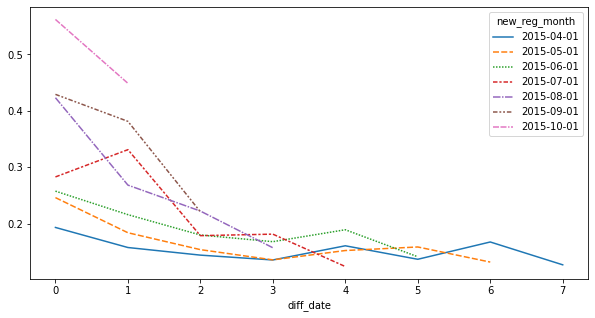

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=itog[['2015-04-01','2015-05-01','2015-06-01','2015-07-01','2015-08-01','2015-09-01','2015-10-01']])

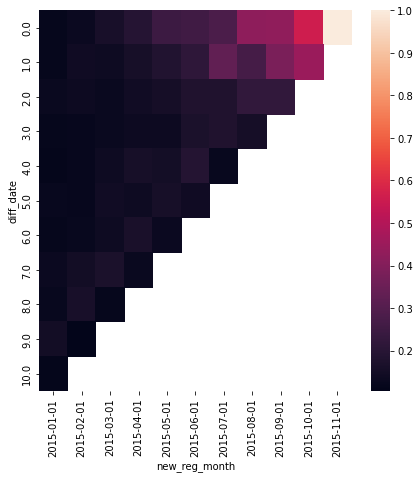

In [30]:
plt.figure(figsize=(7,7))
sns.heatmap(itog)

На графиках выше видно, что в июле 2015 произошли изменения. После Июля Retention для новых пользователей увеличился. Таким образом можно сделать вывод, что данная акция позволила увеличить Retention для новых пользователей.